# **Covid_19 Analysis over the world**

# **Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install ydata-profiling

# **Read_Data**

In [3]:
covid=  pd.read_csv('/content/owid-covid-data.csv')

# **Data Preprocessing and EDA**

In [4]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(covid)
# profile

In [5]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344774,ZWE,Africa,Zimbabwe,2023-09-23,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344775,ZWE,Africa,Zimbabwe,2023-09-24,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344776,ZWE,Africa,Zimbabwe,2023-09-25,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344777,ZWE,Africa,Zimbabwe,2023-09-26,265748.0,0.0,0.0,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [6]:
covid.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [7]:
covid.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
344769,ZWE,Africa,Zimbabwe,2023-09-18,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344770,ZWE,Africa,Zimbabwe,2023-09-19,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344771,ZWE,Africa,Zimbabwe,2023-09-20,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344772,ZWE,Africa,Zimbabwe,2023-09-21,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344773,ZWE,Africa,Zimbabwe,2023-09-22,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344774,ZWE,Africa,Zimbabwe,2023-09-23,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344775,ZWE,Africa,Zimbabwe,2023-09-24,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344776,ZWE,Africa,Zimbabwe,2023-09-25,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344777,ZWE,Africa,Zimbabwe,2023-09-26,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
344778,ZWE,Africa,Zimbabwe,2023-09-27,265748.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [8]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [9]:
covid.shape

(344779, 67)

In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344779 entries, 0 to 344778
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    344779 non-null  object 
 1   continent                                   328403 non-null  object 
 2   location                                    344779 non-null  object 
 3   date                                        344779 non-null  object 
 4   total_cases                                 306964 non-null  float64
 5   new_cases                                   335338 non-null  float64
 6   new_cases_smoothed                          334079 non-null  float64
 7   total_deaths                                285503 non-null  float64
 8   new_deaths                                  335378 non-null  float64
 9   new_deaths_smoothed                         334148 non-null  float64
 

In [11]:
covid.isnull().mean().round(2) * 100

,0
iso_code,0.0
continent,5.0
location,0.0
date,0.0
total_cases,11.0
...,...
population,0.0
excess_mortality_cumulative_absolute,97.0
excess_mortality_cumulative,97.0
excess_mortality,97.0


In [12]:
# covid.pop('excess_mortality_cumulative_absolute') # Removing one column at a time
# covid.pop('excess_mortality_cumulative')
# covid.pop('excess_mortality')
# covid.pop('excess_mortality_cumulative_per_million')

In [156]:
covid.describe().T

,count,mean,min,25%,50%,75%,max,std
date,344779,2021-11-15 06:53:41.214749440,2020-01-01 00:00:00,2020-12-11 00:00:00,2021-11-16 00:00:00,2022-10-21 00:00:00,2023-09-28 00:00:00,NaN
total_cases,306964.0,6571273.559326,1.0,7910.0,68890.0,726902.25,770874669.0,40139134.019007
new_cases,335338.0,9740.989634,0.0,0.0,2.0,276.0,8401961.0,111108.815162
new_cases_smoothed,334079.0,9777.56949,0.0,0.286,26.0,515.143,6402036.286,95191.391173
total_deaths,285503.0,85380.386816,1.0,125.0,1302.0,11744.0,6959303.0,437127.824892
...,...,...,...,...,...,...,...,...
population,344779.0,128191661.284835,47.0,449002.0,5882259.0,28301700.0,7975105024.0,659880346.500763
excess_mortality_cumulative_absolute,11944.0,51133.969086,-37726.098,106.400017,5732.8005,36669.9485,1289776.5,144322.763193
excess_mortality_cumulative,11944.0,9.738,-44.23,1.31,8.06,15.47,76.55,12.384572
excess_mortality,11944.0,11.461947,-95.92,-1.6325,5.77,16.5225,377.63,25.36237


In [158]:
covid.describe(include='object')

,iso_code,continent,location,tests_units
count,344779,328403,344779,106788
unique,255,6,255,4
top,MEX,Africa,Mexico,tests performed
freq,1366,77749,1366,80099


<Axes: >

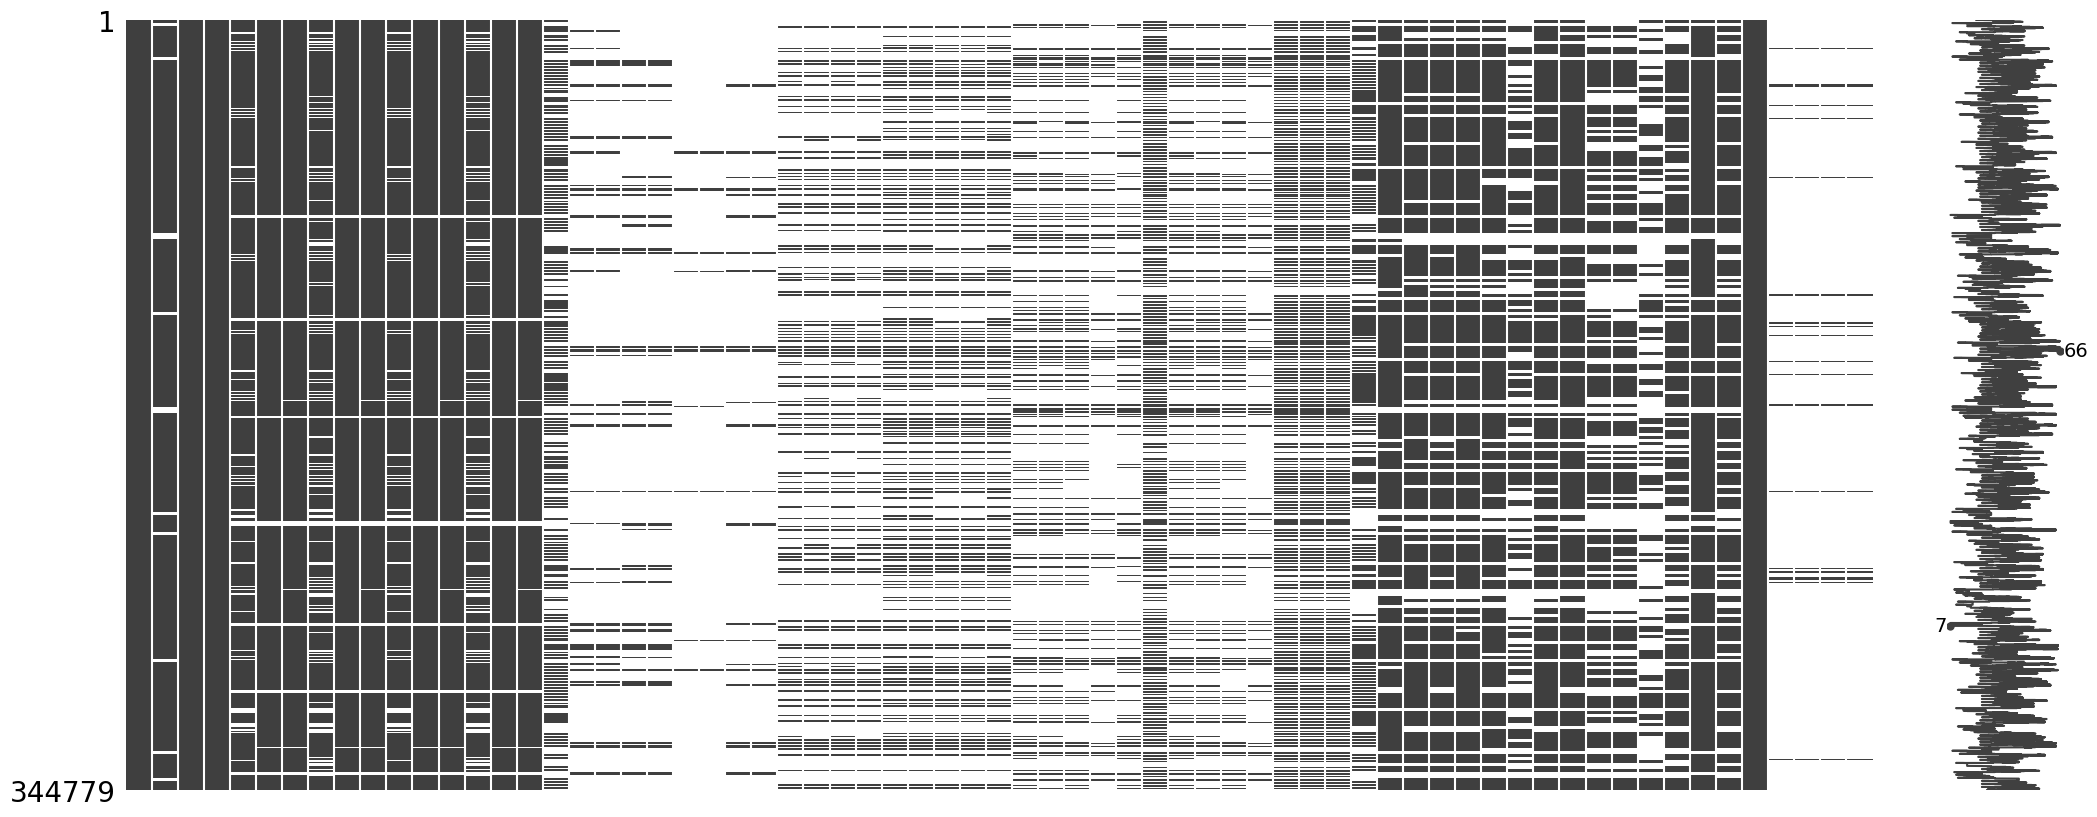

In [14]:
msno.matrix(covid)

In [32]:
# change data type of date
covid['date'] = pd.to_datetime(covid['date'])

In [15]:
covid["continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [16]:
covid['continent'].isnull().sum()

16376

In [17]:
covid["location"].unique().tolist()

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',

In [18]:
covid["location"].isnull().sum()

0

# **Questions**

In [21]:
world = covid[covid.location == 'World']
world

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
339322,OWID_WRL,NaN,World,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
339323,OWID_WRL,NaN,World,2020-01-04,3.0,3.0,NaN,NaN,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
339324,OWID_WRL,NaN,World,2020-01-05,2.0,0.0,NaN,3.0,3.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
339325,OWID_WRL,NaN,World,2020-01-06,5.0,3.0,NaN,3.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
339326,OWID_WRL,NaN,World,2020-01-07,5.0,0.0,NaN,3.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340682,OWID_WRL,NaN,World,2023-09-24,770874669.0,1060.0,5330.857,6959303.0,22.0,24.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
340683,OWID_WRL,NaN,World,2023-09-25,770874669.0,0.0,2709.571,6959303.0,0.0,13.286,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
340684,OWID_WRL,NaN,World,2023-09-26,770874669.0,0.0,412.714,6959303.0,0.0,3.714,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
340685,OWID_WRL,NaN,World,2023-09-27,770874669.0,0.0,393.000,6959303.0,0.0,3.571,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


**total population**

In [28]:
total_population = world['population'].max()
total_population

7975105024.0

**What is the total number of confirmed COVID-19 cases worldwide?**

In [74]:
Total_confirmed = covid[covid['location'] == 'World']['total_cases'].max()
Total_confirmed

770874669.0

**Total deaths?**

In [27]:
Total_death= covid[covid['location'] == 'World']['total_deaths'].max()
Total_death

6959303.0

**total people vaccinated?**

In [30]:
people_vaccinated = covid[covid['location'] == 'World']['people_vaccinated'].max()
people_vaccinated

5624157661.0

**total people fully vaccinated?**

In [31]:
people_fully_vaccinated = covid[covid['location'] == 'World']['people_fully_vaccinated'].max()
people_fully_vaccinated

5171594910.0

**What is the average number of new cases per day worldwide?**

In [56]:
average_new_cases = covid[covid['location'] == 'World']['new_cases'].mean().round()
average_new_cases

565217.0

**What is the average number of new deaths per day worldwide?**

In [50]:
average_new_deaths = covid[covid['location'] == 'World']['new_deaths'].mean().round()
average_new_deaths

5107.0

**What is the highest number of new cases in a single day worldwide?**

In [57]:
highest_new_cases = covid[covid['location'] == 'World']['new_cases'].max()
highest_new_cases

8401961.0

**What is the haighest number of deaths in a single day worldwide?**

In [55]:
highest_deaths = covid[covid['location'] == 'World']['new_deaths'].max()
highest_deaths

27939.0

**What is the average number of new cases per million per day worldwide?**

In [58]:
average_new_cases_per_million = covid[covid['location'] == 'World']['new_cases_per_million'].mean().round()
average_new_cases_per_million

71.0

**What is the average number of new deaths per million per day worldwide?**

In [60]:
average_deaths_per_million = covid[covid['location'] == 'World']['new_deaths_per_million'].mean().round()
average_deaths_per_million

1.0

**What is the total number of booster doses administered worldwide?**

In [61]:
total_booster_doses = covid[covid['location'] == 'World']['total_boosters'].max()
total_booster_doses

2794440112.0

**What is the percentage of the population that infected worldwide?**

In [75]:
percentage_infected = round((Total_confirmed / total_population) * 100, 2)
print(f"{percentage_infected} %")

9.67 %


**What is the percentage of the population that deaths worldwide?**

In [76]:
percentage_deaths = round((Total_death / total_population) * 100, 2)
print(f"{percentage_deaths} %")

0.09 %


**What is the percentage of the population that received booster doses worldwide?**

In [71]:
percentage_booster_doses = round((total_booster_doses / total_population) * 100, 2)
print(f"{percentage_booster_doses} %")

35.04 %


**What is the percentage of the population that received vaccine worldwide?**

In [70]:
percentage_vaccine = round((people_vaccinated / total_population) * 100, 2)
print(f"{percentage_vaccine} %")

70.52 %


**What is the percentage of the population that received fully vaccine worldwide?**

In [72]:
percentage_fully_vaccine = round((people_fully_vaccinated / total_population) * 100, 2)
print(f"{percentage_fully_vaccine} %")

64.85 %


**what is the date of the day that has highest number of new cases?**

In [86]:
covid[covid['new_cases'] == covid['new_cases'].max()]['date']

,date
340080,2022-01-30


**what is the date of the day that has highest number of deaths?**

In [85]:
covid[covid['new_deaths'] == covid['new_deaths'].max()]['date']

,date
339709,2021-01-24


**what is the date of the days have lowest number of deaths?**

In [95]:
covid[covid['new_deaths'] == covid['new_deaths'].min()]['date'].head()

,date
0,2020-01-03
1,2020-01-04
2,2020-01-05
3,2020-01-06
4,2020-01-07


**What is the percentage of the population aged 65 or older worldwide?**

In [103]:
percentage_65_older = round((covid[covid['location'] == 'World']['aged_65_older'].mean()), 2)
print(f"{percentage_65_older} %")

8.7 %


**What is the percentage of the population aged 70 or older worldwide?**

In [104]:
percentage_65_older = round((covid[covid['location'] == 'World']['aged_70_older'].mean()), 2)
print(f"{percentage_65_older} %")

5.36 %


**What is the diabetes prevalence rate worldwide?**

In [108]:
cardio_death_rate = round((covid[covid['location'] == 'World']['diabetes_prevalence'].mean()), 2)
print(f"{cardio_death_rate} %")

8.51 %


**% of females smokers**

In [122]:
percentage_female_smokers = round(covid[covid['location'] == 'World']['female_smokers'].mean(), 2)
print(f"{percentage_female_smokers} %")

6.43 %


**% of males smokers**

In [126]:
percentage_male_smokers = round(covid[covid['location'] == 'World']['male_smokers'].mean(), 2)
print(f"{percentage_male_smokers} %")

34.64 %


In [33]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344779 entries, 0 to 344778
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    344779 non-null  object        
 1   continent                                   328403 non-null  object        
 2   location                                    344779 non-null  object        
 3   date                                        344779 non-null  datetime64[ns]
 4   total_cases                                 306964 non-null  float64       
 5   new_cases                                   335338 non-null  float64       
 6   new_cases_smoothed                          334079 non-null  float64       
 7   total_deaths                                285503 non-null  float64       
 8   new_deaths                                  335378 non-null  float64      

# **Visualizations**

In [149]:
world = covid[covid.location == 'World']

**How has the total number of confirmed cases evolved over time worldwide?**

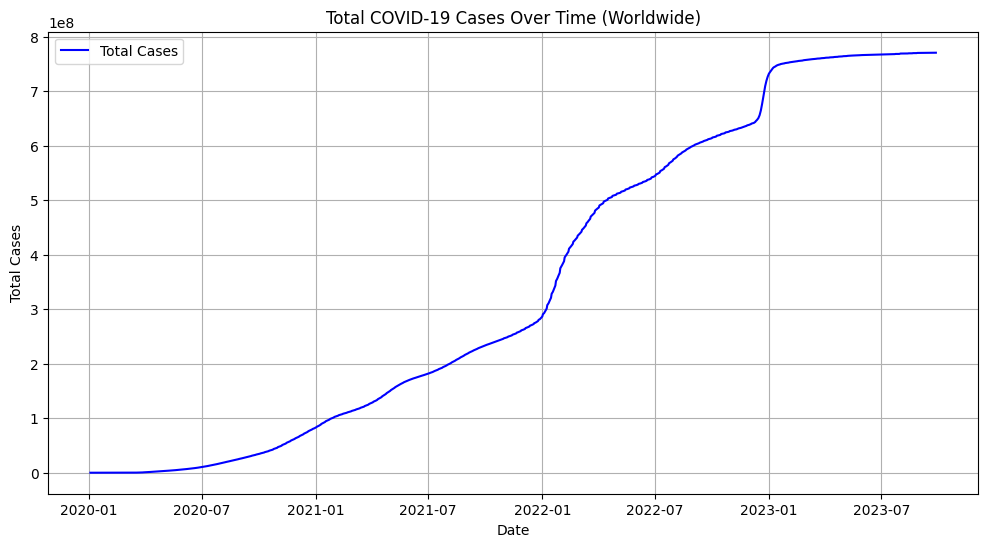

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(world['date'], world['total_cases'], label='Total Cases', color='blue')
plt.title('Total COVID-19 Cases Over Time (Worldwide)')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

**Daily new cases with covid_19??**

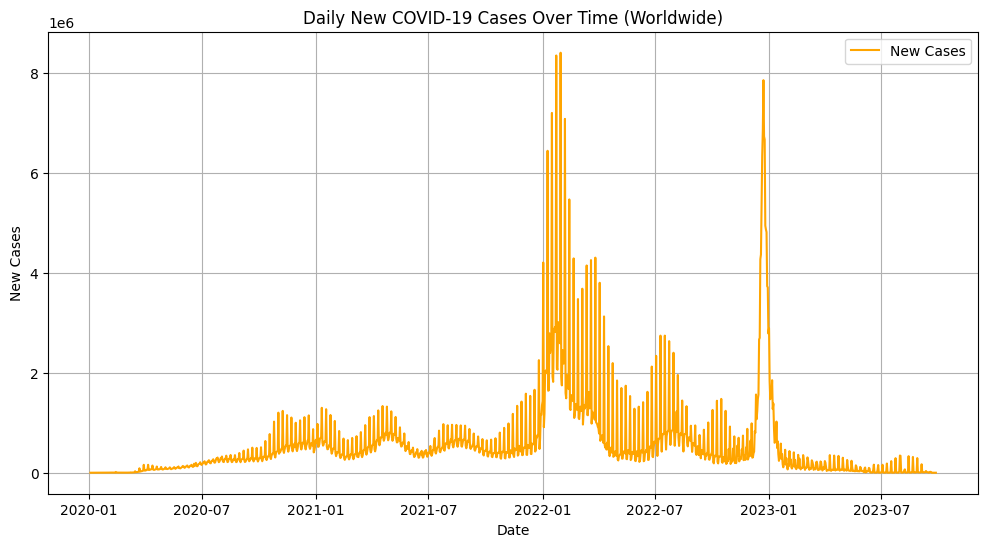

In [146]:
plt.figure(figsize=(12, 6))
plt.plot(world['date'], world['new_cases'], label='New Cases', color='orange')
plt.title('Daily New COVID-19 Cases Over Time (Worldwide)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.legend()
plt.show()

**Total Deaths over time??**

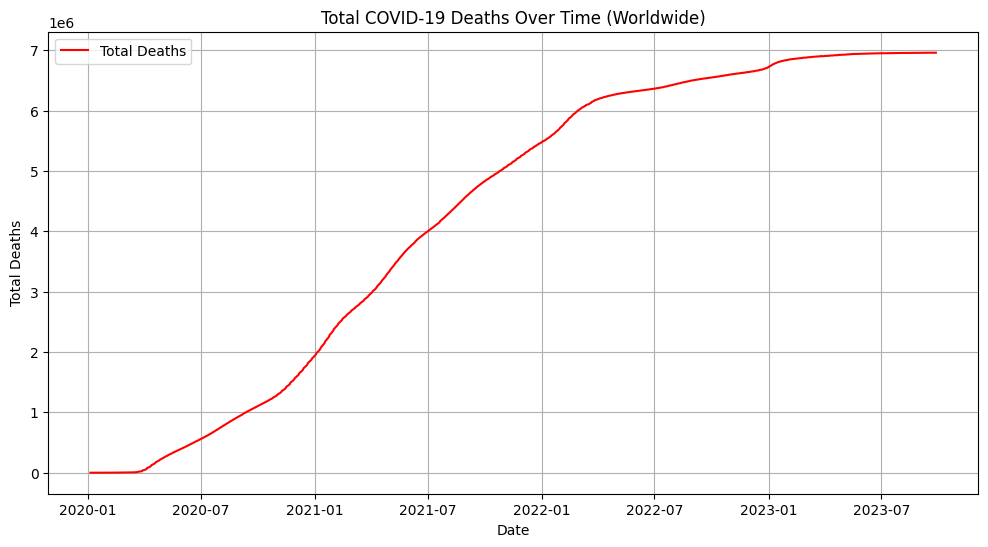

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(world['date'], world['total_deaths'], label='Total Deaths', color='red')
plt.title('Total COVID-19 Deaths Over Time (Worldwide)')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.legend()
plt.show()

**Daily new deaths by covid 19??**

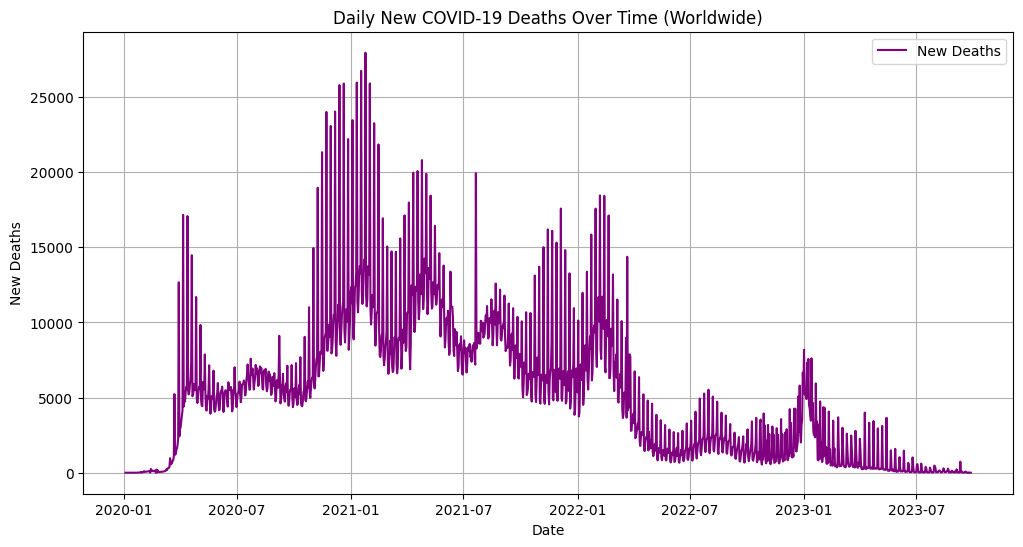

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(world['date'], world['new_deaths'], label='New Deaths', color='purple')
plt.title('Daily New COVID-19 Deaths Over Time (Worldwide)')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.grid(True)
plt.legend()
plt.show()

**Vaccination over time ??**

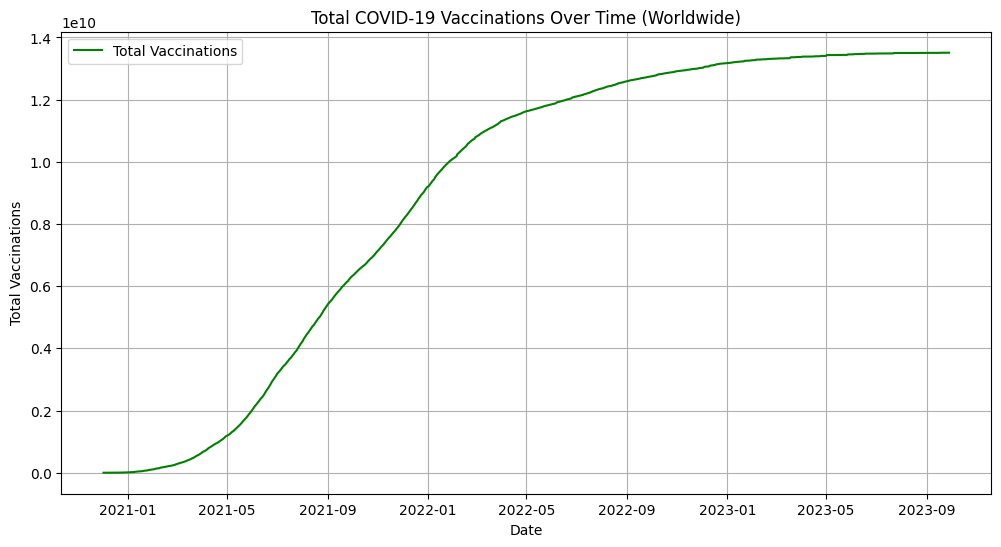

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(world['date'], world['total_vaccinations'], label='Total Vaccinations', color='green')
plt.title('Total COVID-19 Vaccinations Over Time (Worldwide)')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.legend()
plt.show()

# **Finally**